In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [9]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [10]:
trainset = torchvision.datasets.MNIST(root='C:/Users/bitcamp/Desktop/데이타',train=True,download=True, transform=transform)

testset = torchvision.datasets.MNIST(root='C:/Users/bitcamp/Desktop/데이타',train=True,download=True, transform=transform)

In [11]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

test_loader= DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [12]:
image, label = next(iter(train_loader))

In [13]:
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [14]:
def imshow(img):
    img = img /2 + 0.5
    npimg = img.numpy()
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

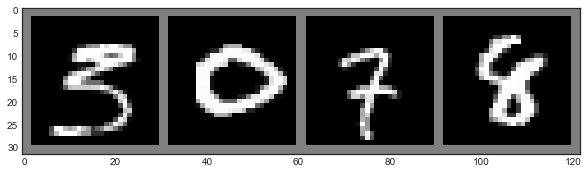

In [15]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:4]))

In [29]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x= F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)    

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [30]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [31]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.0773, -0.1090,  0.0776,  0.0679,  0.0491, -0.0546,  0.2004,  0.0233,
          0.0931,  0.1393]], grad_fn=<AddmmBackward0>)


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [33]:
total_batch = len(train_loader)
print(total_batch)

469


In [35]:
for epoch in range(2):
    
    running_loss = 0.0
    for i,data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch + 1 , i+1, running_loss/2000))
            running_loss = 0.0

Epoch: 1, Iter: 100, Loss: 0.11450892770290375
Epoch: 1, Iter: 200, Loss: 0.11377483808994293
Epoch: 1, Iter: 300, Loss: 0.11258974504470826
Epoch: 1, Iter: 400, Loss: 0.10982429647445678
Epoch: 2, Iter: 100, Loss: 0.08869760656356812
Epoch: 2, Iter: 200, Loss: 0.06046812120079994
Epoch: 2, Iter: 300, Loss: 0.041164223790168764
Epoch: 2, Iter: 400, Loss: 0.03235857351124287


In [36]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [37]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [38]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

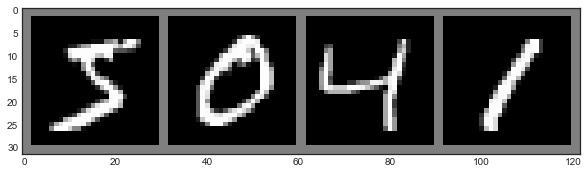

In [39]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:4]))

In [40]:
outputs = net(images)

In [41]:
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([3, 0, 7, 1, 9, 2, 1, 3, 1, 4, 3, 1, 3, 6, 1, 7, 2, 8, 6, 7, 4, 0, 9, 1,
        3, 2, 9, 3, 2, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 7, 3, 9, 8, 5,
        3, 3, 3, 0, 7, 9, 7, 8, 0, 9, 4, 1, 4, 4, 6, 0, 0, 5, 6, 1, 0, 0, 8, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 0, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 5, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0,
        7, 0, 2, 7, 1, 8, 6, 4])


In [44]:
print(''.join('{}\t'.format(str(predicted[j].numpy())) for j in range(4)))

3	0	7	1	


In [46]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

83.94333333333333


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [49]:
torch.cuda.is_available()


True

In [50]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [51]:
device

device(type='cuda')

In [52]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

trainset = torchvision.datasets.MNIST(root='C:/Users/bitcamp/Desktop/데이타',train=True,download=True, transform=transform)

testset = torchvision.datasets.MNIST(root='C:/Users/bitcamp/Desktop/데이타',train=True,download=True, transform=transform)

train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

test_loader= DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [53]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x= F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)    

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [54]:
net = Net().to(device)

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [56]:
for epoch in range(2):
    
    running_loss = 0.0
    for i,data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:
            print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch + 1 , i+1, running_loss/2000))
            running_loss = 0.0

Epoch: 1, Iter: 100, Loss: 0.11515744400024414
Epoch: 1, Iter: 200, Loss: 0.11487080442905426
Epoch: 1, Iter: 300, Loss: 0.11459795784950257
Epoch: 1, Iter: 400, Loss: 0.11423582947254181
Epoch: 2, Iter: 100, Loss: 0.11329523873329163
Epoch: 2, Iter: 200, Loss: 0.11224433827400207
Epoch: 2, Iter: 300, Loss: 0.10987047016620637
Epoch: 2, Iter: 400, Loss: 0.104016796708107


In [57]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(100 * correct / total)

52.66
